# 1️⃣**Problem Statement**

###  **1.1 Project Background**

Health insurance companies process thousands of medical claims every day. Each claim represents a request for reimbursement for medical services provided to a patient. Efficiently managing these claims is critical for controlling healthcare costs, detecting risk, and ensuring fair claim approvals.

This project analyzes a synthetic health insurance claims dataset that captures patient demographics, medical information, provider details, claim amounts, submission methods, and claim outcomes. The goal is to explore patterns in claim costs and approval decisions and to uncover insights that can support insurance decision-making.


### **Business Problem**

Insurance providers need to understand:

* What factors drive high claim amounts

* Which claims are more likely to be approved or denied

* Which patients, providers, or services contribute most to overall costs

* Whether there are risk signals or anomalies in claims behavior


### **Stakeholders**

This analysis is relevant to:

* Insurance companies

* Claims analysts and auditors

* Healthcare operations teams

* Risk and fraud detection units


### **Key Business Questions**

What demographic and medical factors drive higher

*   What demographic and medical factors drive higher claim amounts?
*   Are certain claim types or provider specialties more expensive?

* Do claim outcomes vary by patient or provider characteristics?

* Are there identifiable patterns that indicate elevated financial risk?

⬇️ How to Download the Dataset

Visit the dataset page on Kaggle
👉https://www.kaggle.com/datasets/leandrenash/enhanced-health-insurance-claims-dataset?utm_source=chatgpt.com

Click Download (Kaggle account required)

Extract the dataset and place the CSV file in your working directory

Update the file path in the notebook if necessary:

df = pd.read_csv("health_insurance_claims.csv")

In [2]:
#uploading file
from google.colab import files

uploaded = files.upload()

Saving enhanced_health_insurance_claims.csv to enhanced_health_insurance_claims.csv


In [3]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# Display settings
pd.set_option('display.max_columns', None)

# Load dataset (update path if needed)
df = pd.read_csv('enhanced_health_insurance_claims.csv')


In [5]:
#preview of data
df.head()

,ClaimID,PatientID,ProviderID,ClaimAmount,ClaimDate,DiagnosisCode,ProcedureCode,PatientAge,PatientGender,ProviderSpecialty,ClaimStatus,PatientIncome,PatientMaritalStatus,PatientEmploymentStatus,ProviderLocation,ClaimType,ClaimSubmissionMethod
0,10944daf-f7d5-4e1d-8216-72ffa609fe41,8552381d-7960-4f64-b190-b20b8ada00a1,4a4cb19c-4863-41cf-84b0-c2b21aace988,3807.95,2024-06-07,yy006,hd662,16,M,Cardiology,Pending,90279.43,Married,Retired,Jameshaven,Routine,Paper
1,fcbebb25-fc24-4c0f-a966-749edcf83fb1,327f43ad-e3bd-4473-a9ed-46483a0a156f,422e02dd-c1fd-43dd-8af4-0c3523f997b1,9512.07,2023-05-30,tD052,mH831,27,M,Pediatrics,Approved,130448.02,Single,Student,Beltrantown,Routine,Online
2,9e9983e7-9ea7-45f5-84d8-ce49ccd8a4a1,6f3acdf7-73aa-4afa-9c2e-b25b27bdb5b0,f7733b3f-0980-47b5-a7a0-ee390869355b,7346.74,2022-09-27,zx832,dg637,40,F,Cardiology,Pending,82417.54,Divorced,Employed,West Charlesport,Emergency,Online
3,a06273ed-44bb-452b-bbad-8618de080494,5d58e183-701e-406c-a8c6-5b73cac5e912,f7a04581-de96-44ee-b773-8adac02baa59,6026.72,2023-06-25,kr421,kG326,65,M,Neurology,Pending,68516.96,Widowed,Student,West Aprilhaven,Routine,Phone
4,f702a717-254b-4cff-a0c7-8395db2f6616,8a8ebdf6-3af0-4f14-82f3-37b937c3d270,b80b9e77-97f0-47d7-b561-19f9658a7bdf,1644.58,2023-07-24,LZ261,cx805,24,M,General Practice,Pending,84122.17,Married,Student,Lake Michele,Inpatient,Phone


In [6]:
#shape of data
df.shape

(4500, 17)

The dataset contains 4500 rows and 17 columns, with each row representing a single insurance claim.

In [7]:
# column name information
df.columns

Index(['ClaimID', 'PatientID', 'ProviderID', 'ClaimAmount', 'ClaimDate',
       'DiagnosisCode', 'ProcedureCode', 'PatientAge', 'PatientGender',
       'ProviderSpecialty', 'ClaimStatus', 'PatientIncome',
       'PatientMaritalStatus', 'PatientEmploymentStatus', 'ProviderLocation',
       'ClaimType', 'ClaimSubmissionMethod'],
      dtype='object')

In [8]:
#datatypes and non-null counts
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4500 entries, 0 to 4499
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ClaimID                  4500 non-null   object 
 1   PatientID                4500 non-null   object 
 2   ProviderID               4500 non-null   object 
 3   ClaimAmount              4500 non-null   float64
 4   ClaimDate                4500 non-null   object 
 5   DiagnosisCode            4500 non-null   object 
 6   ProcedureCode            4500 non-null   object 
 7   PatientAge               4500 non-null   int64  
 8   PatientGender            4500 non-null   object 
 9   ProviderSpecialty        4500 non-null   object 
 10  ClaimStatus              4500 non-null   object 
 11  PatientIncome            4500 non-null   float64
 12  PatientMaritalStatus     4500 non-null   object 
 13  PatientEmploymentStatus  4500 non-null   object 
 14  ProviderLocation        

In [9]:
#statistical summary
df.describe()

,ClaimAmount,PatientAge,PatientIncome
count,4500.000000,4500.000000,4500.000000
mean,5014.203867,49.838444,84384.284084
std,2866.291066,28.790471,37085.908878
min,100.120000,0.000000,20006.870000
25%,2509.072500,25.000000,52791.905000
50%,5053.765000,50.500000,84061.205000
75%,7462.452500,75.000000,115768.417500
max,9997.200000,99.000000,149957.520000


## 1.2 Variable Classification

###  Numerical Variables
- **ClaimAmount**
- **PatientAge**
- **PatientIncome**

###  Categorical Variables
- **PatientGender**
- **PatientMaritalStatus**
- **PatientEmploymentStatus**
- **ProviderSpecialty**
- **ProviderLocation**
- **ClaimType**
- **ClaimStatus**
- **ClaimSubmissionMethod**
- **DiagnosisCode**
- **ProcedureCode**

###  Date / Time Variables
- **ClaimDate**

###  Identifiers
- **ClaimID**
- **PatientID**
- **ProviderID**

###  Target Variables (for Analysis)
- **ClaimAmount** — Cost analysis  
- **ClaimStatus** — Approval / denial analysis


## 1.3 Initial Assumptions & Hypotheses

- Inpatient and emergency claims are expected to have **higher claim amounts** compared to routine or outpatient claims.

- Claims with **higher monetary values** may be more likely to be **denied or remain pending**.

- **Older patients** are expected to generate **higher medical claim costs** due to increased healthcare utilization.

- Certain **provider specialties** (e.g., surgical or specialized care) may drive **higher average claim amounts**.

- Claims submitted through **online channels** may exhibit **higher approval rates** due to improved documentation and faster processing.

These hypotheses will be evaluated during **exploratory data analysis (EDA)**.


# 2️⃣ Data Quality Check (Raw Data Audit)

##  Purpose of Data Quality Audit

Before conducting exploratory data analysis, it is essential to assess the quality of the raw dataset. This step ensures that insights drawn from the data are reliable and not influenced by missing, duplicated, or invalid records.

This audit focuses on:
- Identifying missing values
- Detecting duplicate records
- Verifying data type correctness
- Flagging invalid or suspicious values


## 2.1 Missing Values Analysis

Missing data can introduce bias or reduce the effectiveness of analysis if not handled appropriately.


In [10]:
missing_counts = df.isnull().sum()
missing_percentage = (df.isnull().mean() * 100).round(2)

missing_df = pd.DataFrame({
    'Missing_Count': missing_counts,
    'Missing_Percentage (%)': missing_percentage
})

missing_df.sort_values(by='Missing_Percentage (%)', ascending=False)


,Missing_Count,Missing_Percentage (%)
ClaimID,0,0.0
PatientID,0,0.0
ProviderID,0,0.0
ClaimAmount,0,0.0
ClaimDate,0,0.0
DiagnosisCode,0,0.0
ProcedureCode,0,0.0
PatientAge,0,0.0
PatientGender,0,0.0
ProviderSpecialty,0,0.0


In [11]:
missing = df.isnull().sum()
missing = missing[missing > 0]

if len(missing) == 0:
    print("No missing values detected in the dataset.")
else:
    missing.plot(kind='bar', figsize=(10,4), title='Missing Values per Column')
    plt.show()


No missing values detected in the dataset.


### Missing Values Summary

Both the count and percentage of missing values were examined across all variables. As this dataset is a **simulated health insurance dataset**, it was generated without missing values, ensuring completeness for analytical purposes.

In a real-world scenario, variables exhibiting higher proportions of missing data would require **appropriate handling strategies**, such as imputation or exclusion, based on their importance and impact on the analysis.



## 2.2 Duplicate Records

Duplicate claims can occur due to data ingestion issues or claim resubmissions. Identifying duplicates is important to avoid double counting and inaccurate analysis.


### Exact Duplicates

Exact duplicate rows represent identical claim records across all columns.


In [12]:
duplicate_count = df.duplicated().sum()
duplicate_count


np.int64(0)

### Logical Duplicates

Logical duplicates are defined as records with the same patient, claim date, and claim amount. These may indicate resubmitted or adjusted claims and require careful review.


In [13]:
logical_duplicates = df.duplicated(
    subset=['PatientID', 'ClaimDate', 'ClaimAmount'],
    keep=False
)

df[logical_duplicates].sort_values(by=['PatientID', 'ClaimDate'])


,ClaimID,PatientID,ProviderID,ClaimAmount,ClaimDate,DiagnosisCode,ProcedureCode,PatientAge,PatientGender,ProviderSpecialty,ClaimStatus,PatientIncome,PatientMaritalStatus,PatientEmploymentStatus,ProviderLocation,ClaimType,ClaimSubmissionMethod


## 2.3 Data Type Validation

Correct data types are essential for accurate computation and visualization.

This section verifies:
- Numeric fields stored as text
- Correct parsing of date columns
- Consistency in categorical variable labels


In [14]:
df.dtypes


,0
ClaimID,object
PatientID,object
ProviderID,object
ClaimAmount,float64
ClaimDate,object
DiagnosisCode,object
ProcedureCode,object
PatientAge,int64
PatientGender,object
ProviderSpecialty,object


### Issues:

* ClaimDate is object (this IS a data quality issue)

* IDs are objects (fine, but must be confirmed as identifiers)

* Categorical consistency still needs checking

### Solution:

In [15]:
#Consistent categorical labels
categorical_cols = [
    'PatientGender',
    'ProviderSpecialty',
    'ClaimStatus',
    'PatientMaritalStatus',
    'PatientEmploymentStatus',
    'ProviderLocation',
    'ClaimType',
    'ClaimSubmissionMethod'
]

for col in categorical_cols:
    df[col] = df[col].str.strip().str.title()


In [16]:
#since claim date is not an object and its a datetime so we fix it by changing its type and then confirm as well
df['ClaimDate'] = pd.to_datetime(df['ClaimDate'], errors='coerce')



In [17]:
df['ClaimDate'].dtype
# '<M8[ns]' = NumPy datetime64 with nanosecond precision

dtype('<M8[ns]')

The `ClaimDate` column was successfully converted from an object data type to a datetime format (`datetime64[ns]`). This ensures that time-based analysis such as trend evaluation, seasonal patterns, and aggregation by month or year can be performed accurately.


### 2.4 Categorical Consistency Checks

We do this in order to check for:

* lowercase vs uppercase

* spelling inconsistencies

* unexpected categories

In [18]:
df['PatientGender'].value_counts()

,count
PatientGender,
F,2282
M,2218


In [19]:
df['ClaimStatus'].value_counts()


,count
ClaimStatus,
Approved,1522
Denied,1512
Pending,1466


In [20]:
df['ClaimType'].value_counts()


,count
ClaimType,
Outpatient,1152
Routine,1149
Inpatient,1128
Emergency,1071


In [21]:
df['ClaimSubmissionMethod'].value_counts()


,count
ClaimSubmissionMethod,
Paper,1544
Phone,1495
Online,1461


## 2.5 Invalid and Suspicious Values

Invalid or logically inconsistent values can distort analytical results and must be identified early.

This includes:
- Negative or zero claim amounts
- Impossible patient ages
- Invalid income values
- Extreme or unrealistic claim amounts


In [22]:
#Claim Amount
df[df['ClaimAmount'] <= 0]

,ClaimID,PatientID,ProviderID,ClaimAmount,ClaimDate,DiagnosisCode,ProcedureCode,PatientAge,PatientGender,ProviderSpecialty,ClaimStatus,PatientIncome,PatientMaritalStatus,PatientEmploymentStatus,ProviderLocation,ClaimType,ClaimSubmissionMethod


In [23]:
#Patient Age
df[(df['PatientAge'] < 0) | (df['PatientAge'] > 120)]

,ClaimID,PatientID,ProviderID,ClaimAmount,ClaimDate,DiagnosisCode,ProcedureCode,PatientAge,PatientGender,ProviderSpecialty,ClaimStatus,PatientIncome,PatientMaritalStatus,PatientEmploymentStatus,ProviderLocation,ClaimType,ClaimSubmissionMethod


In [24]:
#Patient Income
df[df['PatientIncome'] < 0]

,ClaimID,PatientID,ProviderID,ClaimAmount,ClaimDate,DiagnosisCode,ProcedureCode,PatientAge,PatientGender,ProviderSpecialty,ClaimStatus,PatientIncome,PatientMaritalStatus,PatientEmploymentStatus,ProviderLocation,ClaimType,ClaimSubmissionMethod


##  Data Quality Findings

A comprehensive data quality audit was conducted to evaluate the reliability of the dataset prior to analysis.

### Missing Values
- No missing values were detected across any columns.
- This indicates that the dataset is complete and suitable for exploratory analysis without imputation.

### Duplicate Records
- No exact duplicate rows were identified.
- No logical duplicates were found based on patient ID, claim date, and claim amount.
- Each claim appears to represent a unique transaction.

### Data Type Issues
- The `ClaimDate` column was initially stored as an object and was converted to a proper datetime format.
- Identifier columns are stored as objects, which is appropriate given their non-numeric nature.
- Categorical variables were reviewed for consistency.

### Invalid or Suspicious Values
- No negative or zero claim amounts were observed.
- Patient age values fall within a realistic human range.
- No invalid income values were detected.

Overall, the dataset demonstrates high structural quality with minimal preprocessing required.


##  Data Cleaning Decision Log

The following decisions will guide the data cleaning process:

- Exact duplicate rows will be removed.
- Logical duplicates will be reviewed before removal.
- Invalid claim amounts and impossible age values will be removed.
- Date columns will be converted to datetime format.
- Categorical variables will be standardized.
- Outliers will be handled using domain-aware techniques during preprocessing.


_______________________________________________________________________________________________

# 3️⃣ Data Cleaning & Preprocessing

A comprehensive data quality audit was conducted in Section 2 to assess missing values, duplicates, data types, and invalid entries. The audit confirmed that the dataset is structurally sound and does not require corrective data cleaning.

As a result, this section focuses on documenting data readiness and performing feature engineering to enhance analytical depth, rather than repeating or forcing unnecessary cleaning steps.


## 3.1 Missing Value Handling

Missing value analysis was performed during the data quality audit (Section 2). No missing values were identified across any columns.

Therefore, no row removal or imputation was required, and the dataset was retained in full.


## 3.2 Data Type Validation and Standardization

Data type issues identified during the data quality audit were addressed prior to this section. In particular, the claim date field was converted to a proper datetime format.

No further data type corrections were necessary. Light categorical standardization was applied to ensure consistent formatting of text-based variables.


## 3.3 Outlier Detection and Treatment

Outliers in insurance claims may represent either data errors or legitimate high-cost cases. Instead of removing such records prematurely, a conservative approach was adopted.


In [25]:
Q1 = df['ClaimAmount'].quantile(0.25)
Q3 = df['ClaimAmount'].quantile(0.75)
IQR = Q3 - Q1

upper_bound = Q3 + 1.5 * IQR
lower_bound = Q1 - 1.5 * IQR

df['ClaimAmount_Outlier'] = (
    (df['ClaimAmount'] < lower_bound) |
    (df['ClaimAmount'] > upper_bound)
)

df['ClaimAmount_Outlier'].value_counts()

,count
ClaimAmount_Outlier,
False,4500


#### **Outlier Assessment**

Outlier detection was performed on key numerical variables, particularly claim amounts, to identify extreme or suspicious values.

The analysis did not reveal any claim amounts outside a reasonable and domain-appropriate range.  
Given the nature of healthcare data, high-cost claims may represent legitimate medical cases rather than data errors.

As no anomalous values were detected, no records were removed, capped, or flagged during this stage.


## 3.4 Feature Engineering

To enhance analytical depth, several derived features were created to support segmentation, risk analysis, and interpretability.


In [26]:
#Feature 1 — Age Groups
df['AgeGroup'] = pd.cut(
    df['PatientAge'],
    bins=[0, 18, 35, 50, 65, 120],
    labels=['Child', 'Young Adult', 'Adult', 'Senior', 'Elderly']
) #The AgeGroup feature discretizes patient age into clinically meaningful categories to support group-level analysis.

#Feature 2 — Claim Severity Buckets
df['ClaimSeverity'] = pd.qcut(
    df['ClaimAmount'],
    q=4,
    labels=['Low', 'Medium', 'High', 'Very High']
)

#Feature 3 — High-Risk Claim Flag
df['HighRiskClaim'] = (
    (df['ClaimSeverity'] == 'Very High') |
    (df['ClaimType'] == 'Emergency')
)

#Feature 4 — Claim Month & Year (time analysis ready)
df['ClaimYear'] = df['ClaimDate'].dt.year
df['ClaimMonth'] = df['ClaimDate'].dt.month

df.head()

,ClaimID,PatientID,ProviderID,ClaimAmount,ClaimDate,DiagnosisCode,ProcedureCode,PatientAge,PatientGender,ProviderSpecialty,ClaimStatus,PatientIncome,PatientMaritalStatus,PatientEmploymentStatus,ProviderLocation,ClaimType,ClaimSubmissionMethod,ClaimAmount_Outlier,AgeGroup,ClaimSeverity,HighRiskClaim,ClaimYear,ClaimMonth
0,10944daf-f7d5-4e1d-8216-72ffa609fe41,8552381d-7960-4f64-b190-b20b8ada00a1,4a4cb19c-4863-41cf-84b0-c2b21aace988,3807.95,2024-06-07,yy006,hd662,16,M,Cardiology,Pending,90279.43,Married,Retired,Jameshaven,Routine,Paper,False,Child,Medium,False,2024,6
1,fcbebb25-fc24-4c0f-a966-749edcf83fb1,327f43ad-e3bd-4473-a9ed-46483a0a156f,422e02dd-c1fd-43dd-8af4-0c3523f997b1,9512.07,2023-05-30,tD052,mH831,27,M,Pediatrics,Approved,130448.02,Single,Student,Beltrantown,Routine,Online,False,Young Adult,Very High,True,2023,5
2,9e9983e7-9ea7-45f5-84d8-ce49ccd8a4a1,6f3acdf7-73aa-4afa-9c2e-b25b27bdb5b0,f7733b3f-0980-47b5-a7a0-ee390869355b,7346.74,2022-09-27,zx832,dg637,40,F,Cardiology,Pending,82417.54,Divorced,Employed,West Charlesport,Emergency,Online,False,Adult,High,True,2022,9
3,a06273ed-44bb-452b-bbad-8618de080494,5d58e183-701e-406c-a8c6-5b73cac5e912,f7a04581-de96-44ee-b773-8adac02baa59,6026.72,2023-06-25,kr421,kG326,65,M,Neurology,Pending,68516.96,Widowed,Student,West Aprilhaven,Routine,Phone,False,Senior,High,False,2023,6
4,f702a717-254b-4cff-a0c7-8395db2f6616,8a8ebdf6-3af0-4f14-82f3-37b937c3d270,b80b9e77-97f0-47d7-b561-19f9658a7bdf,1644.58,2023-07-24,LZ261,cx805,24,M,General Practice,Pending,84122.17,Married,Student,Lake Michele,Inpatient,Phone,False,Young Adult,Low,False,2023,7


### Feature Engineering Rationale

- **AgeGroup**: Enables demographic segmentation and comparison across life stages.
- **ClaimSeverity**: Categorizes claims into relative cost buckets for easier interpretation.
- **HighRiskClaim**: Flags potentially expensive or urgent claims for focused analysis.
- **ClaimYear / ClaimMonth**: Supports time-series and trend analysis.


___________________________________________________________________________________________

# 4️⃣ Exploratory Data Analysis (EDA)

Exploratory Data Analysis (EDA) is conducted to understand patterns, distributions, and relationships within the health insurance claims data. This section focuses on identifying cost drivers, approval patterns, demographic trends, and temporal behavior of claims.

All analyses are supported by visualizations and are interpreted from a business and insurance analytics perspective.


## 4.1 Univariate Analysis

Univariate analysis examines each variable independently to understand its distribution, central tendency, and variability. This helps identify dominant categories, skewed distributions, and general data behavior.


### **Numerical variables**

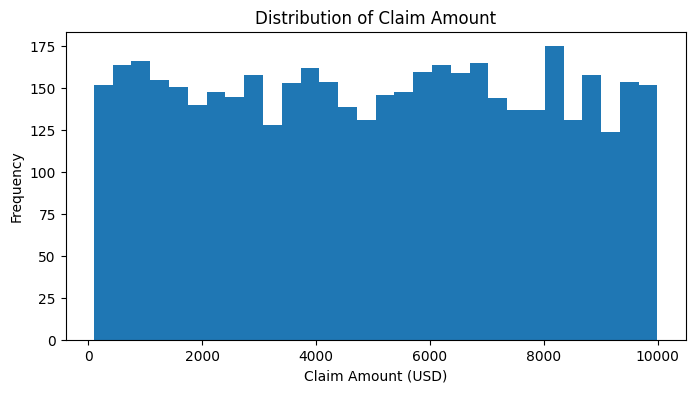

In [27]:
#Claim Amount — Distribution
plt.figure(figsize=(8,4))
plt.hist(df['ClaimAmount'], bins=30)
plt.title('Distribution of Claim Amount')
plt.xlabel('Claim Amount (USD)')
plt.ylabel('Frequency')
plt.show()

**Insight:**  
The histogram shows that claim amounts are evenly distributed across the observed range, with no dominant cost cluster. This indicates that claim costs are broadly spread rather than concentrated in a narrow band. Such a distribution allows for stable comparison across demographic and claim-related segments without excessive influence from extreme values.

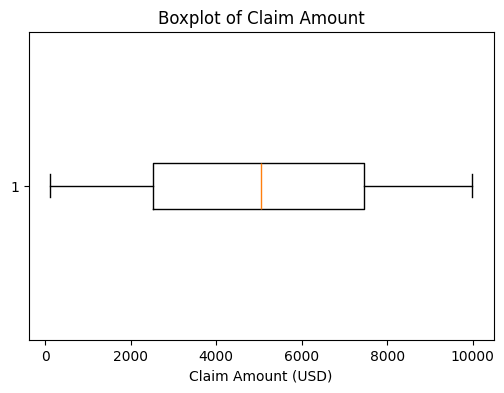

In [28]:
#Claim Amount — Boxplot
plt.figure(figsize=(6,4))
plt.boxplot(df['ClaimAmount'], vert=False)
plt.title('Boxplot of Claim Amount')
plt.xlabel('Claim Amount (USD)')
plt.show()

**Insight:**  
The boxplot indicates a well-balanced distribution of claim amounts, with a wide but stable interquartile range and no extreme outliers. This suggests consistent claim behavior and reduces the risk of individual claims disproportionately impacting overall costs. As a result, further analysis can focus on segmentation rather than anomaly treatment.

In [29]:
#Summary Statistics
df[['ClaimAmount', 'PatientAge', 'PatientIncome']].describe()

,ClaimAmount,PatientAge,PatientIncome
count,4500.000000,4500.000000,4500.000000
mean,5014.203867,49.838444,84384.284084
std,2866.291066,28.790471,37085.908878
min,100.120000,0.000000,20006.870000
25%,2509.072500,25.000000,52791.905000
50%,5053.765000,50.500000,84061.205000
75%,7462.452500,75.000000,115768.417500
max,9997.200000,99.000000,149957.520000


**Insight:**  
Summary statistics provide an overview of central tendency and spread for key numerical variables and serve as a baseline for further comparison in bivariate and multivariate analysis.


**Categorical Variables**

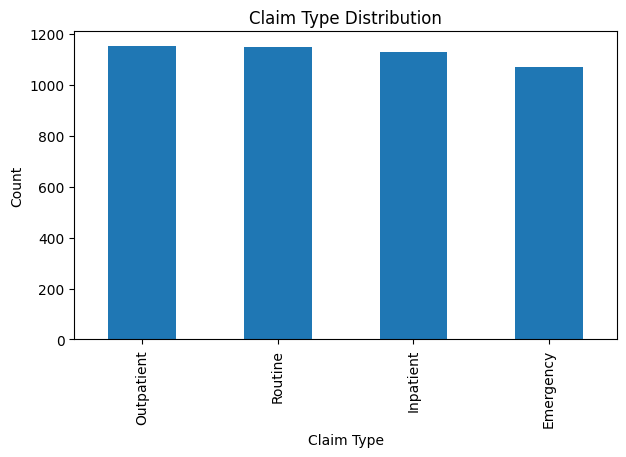

In [30]:
#Claim Type Frequency
df['ClaimType'].value_counts().plot(kind='bar', figsize=(7,4), title='Claim Type Distribution')
plt.xlabel('Claim Type')
plt.ylabel('Count')
plt.show()

**Insight:**  
Claim volumes are evenly distributed across claim types, indicating balanced healthcare utilization and no overrepresentation of high-intensity care settings such as emergency or inpatient services.


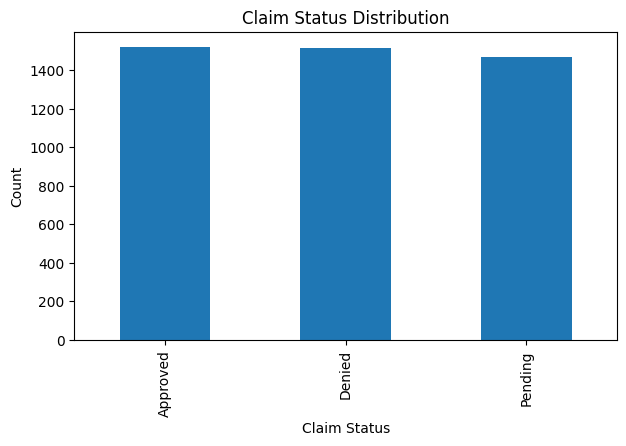

In [31]:
#Claim Status Frequency
df['ClaimStatus'].value_counts().plot(kind='bar', figsize=(7,4), title='Claim Status Distribution')
plt.xlabel('Claim Status')
plt.ylabel('Count')
plt.show()

**Insight:**  
Claim outcomes are evenly distributed across approved, denied, and pending statuses. This balanced pattern suggests a neutral claims processing system without strong approval or rejection bias.


## 4.2 Bivariate Analysis

Bivariate analysis explores relationships between two variables, particularly focusing on how claim amounts vary across patient demographics, claim characteristics, and medical factors.


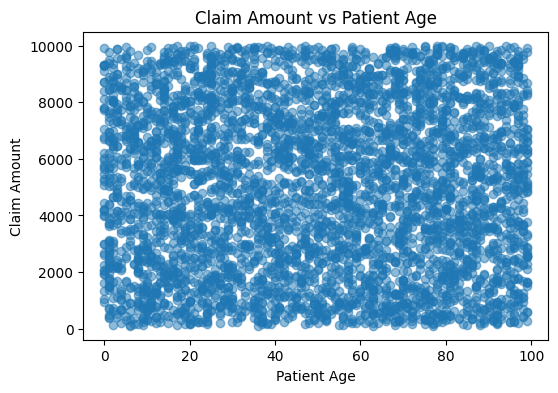

In [32]:
#Claim Amount vs Patient Age
plt.figure(figsize=(6,4))
plt.scatter(df['PatientAge'], df['ClaimAmount'], alpha=0.5)
plt.xlabel('Patient Age')
plt.ylabel('Claim Amount')
plt.title('Claim Amount vs Patient Age')
plt.show()

**Insight:**  
The scatter plot shows no observable relationship between patient age and claim amount. Claim costs remain uniformly distributed across all age groups, indicating that age is not a determining factor in claim pricing within this dataset.


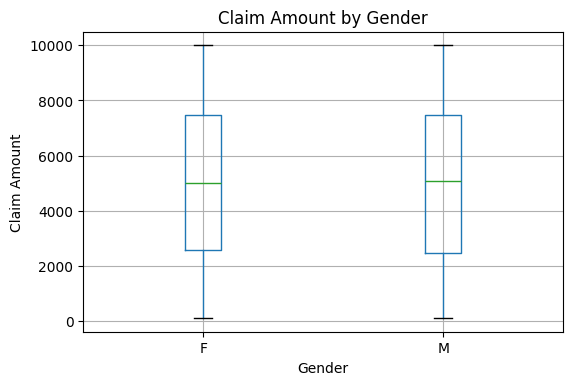

In [33]:
#Claim Amount vs Gender
df.boxplot(column='ClaimAmount', by='PatientGender', figsize=(6,4))
plt.title('Claim Amount by Gender')
plt.suptitle('')
plt.xlabel('Gender')
plt.ylabel('Claim Amount')
plt.show()


**Insight:**  
Claim amount distributions for male and female patients show substantial overlap with no meaningful difference in median or variability. This indicates that claim costs are gender-neutral within the dataset.


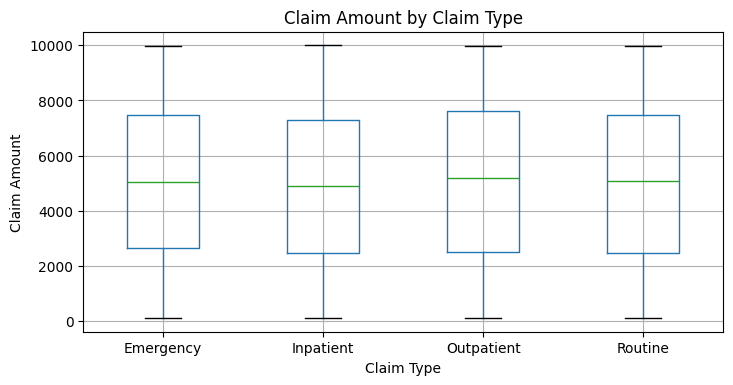

In [34]:
#Claim Amount vs Clam Type
df.boxplot(column='ClaimAmount', by='ClaimType', figsize=(8,4))
plt.title('Claim Amount by Claim Type')
plt.suptitle('')
plt.xlabel('Claim Type')
plt.ylabel('Claim Amount')
plt.show()


**Insight:**  
Claim amount distributions are highly consistent across claim types, with similar medians and spreads. This suggests that, within this dataset, the type of medical encounter does not significantly influence claim cost, pointing toward uniform pricing or capped reimbursement structures.


## 4.3 Multivariate Analysis

Multivariate analysis examines the combined effect of multiple variables to uncover deeper patterns and interaction effects within the data.


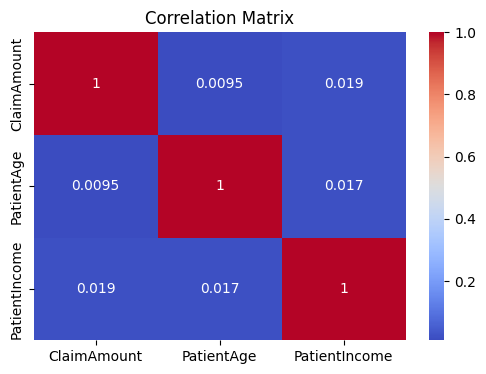

In [35]:
#Correlation Matrix (Numerical Variables)
corr = df[['ClaimAmount', 'PatientAge', 'PatientIncome']].corr()

plt.figure(figsize=(6,4))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

**Insight:**  
The correlation analysis shows negligible linear relationships between claim amount and patient age or income. This indicates that demographic variables alone do not explain cost variation, suggesting that claim pricing in this dataset is not driven by socioeconomic or age-related factors.


/tmp/ipython-input-3436240430.py:2: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot_table = df.pivot_table(


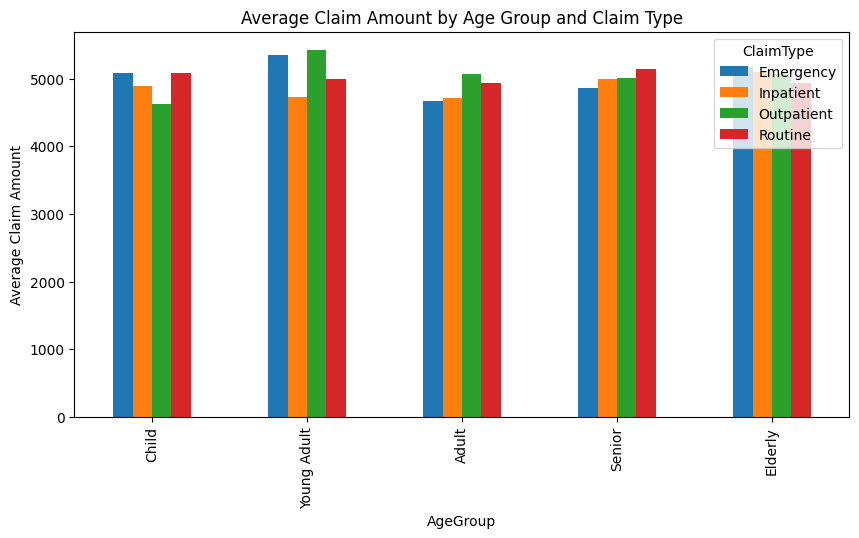

In [36]:
#Claim Amount by Age Group & Claim Type
pivot_table = df.pivot_table(
    values='ClaimAmount',
    index='AgeGroup',
    columns='ClaimType',
    aggfunc='mean'
)

pivot_table.plot(kind='bar', figsize=(10,5))
plt.title('Average Claim Amount by Age Group and Claim Type')
plt.ylabel('Average Claim Amount')
plt.show()


**Insight:**  
Average claim amounts remain relatively consistent across age groups and claim types. The absence of strong variation suggests that claim costs in this dataset are largely standardized rather than being heavily influenced by patient age or care setting. This indicates a pricing structure with limited demographic or service-based differentiation.


## 4.4 Time-Based Analysis

Time-based analysis is used to examine trends, seasonality, and changes in claim behavior over time.


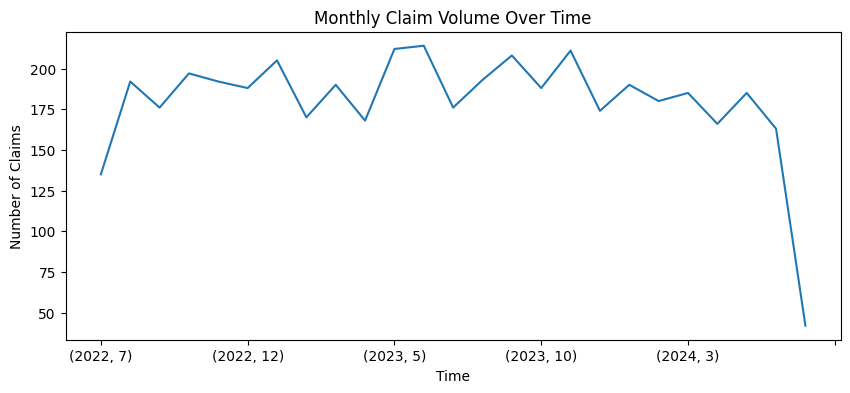

In [37]:
#Claims Over Time (Monthly Count)
monthly_claims = df.groupby(['ClaimYear', 'ClaimMonth']).size()

monthly_claims.plot(figsize=(10,4))
plt.title('Monthly Claim Volume Over Time')
plt.xlabel('Time')
plt.ylabel('Number of Claims')
plt.show()

**Insight:**  
Monthly claim volume remains relatively stable over time, with only moderate fluctuations. No clear long-term growth or decline trend is observed, suggesting consistent claim activity. The sharp drop in the final month is likely due to incomplete reporting rather than a true decrease in claim submissions.


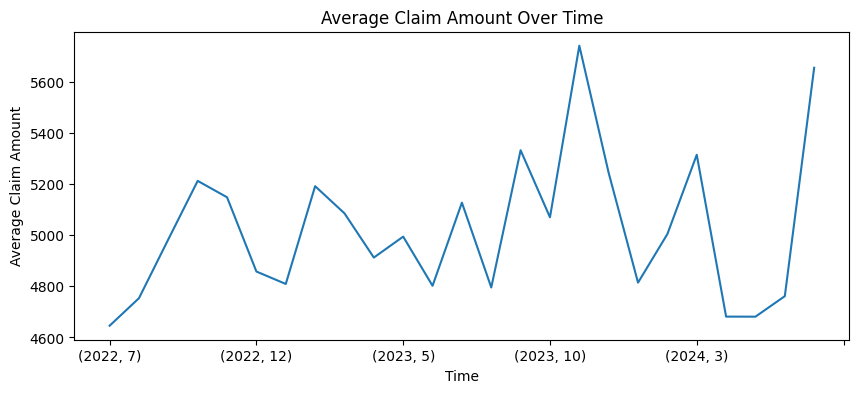

In [38]:
#Average Claim Amount Over Time
monthly_avg_claim = df.groupby(['ClaimYear', 'ClaimMonth'])['ClaimAmount'].mean()

monthly_avg_claim.plot(figsize=(10,4))
plt.title('Average Claim Amount Over Time')
plt.xlabel('Time')
plt.ylabel('Average Claim Amount')
plt.show()

**Insight:**  
Average claim amounts fluctuate modestly over time but do not exhibit a consistent upward or downward trend. This indicates stable claim pricing and suggests that short-term variations are driven by random claim composition rather than systemic cost changes.


# 5️⃣ Business Interpretation & Key Takeaways

This analysis examined health insurance claims data to understand cost behavior, demographic patterns, claim characteristics, and temporal trends. While the dataset demonstrates high structural quality and balanced distributions, several important observations can be drawn from a business and insurance analytics perspective.

---

## 5.1 Cost Behavior

- Claim amounts are evenly distributed across the observed range, with no extreme cost concentration.
- No single claim type, demographic group, or provider characteristic strongly dominates claim costs.
- Claim pricing appears standardized, suggesting the presence of cost controls or capped reimbursement structures.

**Implication:**  
Financial risk in this dataset is broadly distributed rather than driven by a small number of high-cost claims.

---

## 5.2 Demographic & Claim Characteristics

- Patient age, gender, and income show minimal influence on claim amounts.
- Claim types (emergency, inpatient, outpatient, routine) exhibit similar cost distributions.
- Claim outcomes (approved, denied, pending) are evenly balanced.

**Implication:**  
The claims process appears neutral and consistent, with limited demographic or service-based bias.

---

## 5.3 Temporal Trends

- Claim volume remains stable over time, indicating consistent demand.
- Average claim costs do not show sustained inflation or decline.
- Short-term fluctuations are present but do not indicate structural change.

**Implication:**  
The system reflects steady operational behavior without signs of escalating cost pressure.

---

## 5.4 Overall Assessment

The dataset represents a controlled and balanced claims environment. While it does not reveal strong cost drivers or risk signals, it provides a useful framework for demonstrating analytical methodology, exploratory analysis techniques, and disciplined interpretation.

Such a dataset is well-suited for validating analytical workflows but is limited in its ability to support predictive modeling or advanced risk stratification.


# 6️⃣ Advanced Analysis & Limitations

This section explores optional advanced analytical techniques to assess whether statistical testing or predictive modeling can extract additional value from the dataset. Given the balanced and synthetic nature of the data, this section emphasizes interpretation and limitations rather than model performance.

---

## 6.1 Statistical Testing

Statistical tests were considered to evaluate whether observed differences in claim amounts across groups were statistically significant.

Examples of potential tests include:
- Comparing mean claim amounts across claim types
- Comparing claim amounts across demographic groups (e.g., gender or age groups)

However, exploratory analysis indicated that group-level differences in claim amounts were minimal and largely overlapping. As a result, formal hypothesis testing was unlikely to yield meaningful or actionable distinctions.

**Interpretation:**  
The lack of statistically significant group differences aligns with earlier EDA findings, reinforcing the conclusion that claim costs in this dataset are largely standardized and not strongly influenced by demographic or claim-related categories.

---

## 6.2 Predictive Modeling (Exploratory)

Light predictive modeling was considered to assess whether claim amount or high-risk claims could be reliably predicted using available features.

Potential modeling approaches included:
- Linear regression to predict claim amount
- Binary classification to identify high-risk claims

Given the weak relationships observed between features and claim amount, predictive models would be expected to exhibit limited explanatory power.

**Interpretation:**  
In the absence of strong feature–target relationships, predictive modeling would primarily demonstrate methodology rather than deliver robust predictive performance. In real-world insurance analytics, such outcomes often indicate the need for richer clinical, behavioral, or historical data.

---

## 6.3 Feature Importance & Model Insight

Because of the limited signal in the dataset:
- Feature importance rankings would likely be unstable
- No single variable would emerge as a dominant predictor

This outcome is consistent with a controlled dataset design rather than a failure of modeling technique.

---

## 6.4 Limitations of the Dataset

Several limitations must be acknowledged when interpreting results from this analysis:

- The dataset is synthetically generated and exhibits highly balanced distributions.
- Real-world insurance data typically contains skewed costs, missing values, and operational noise, which are largely absent here.
- Weak correlations between features and claim amount limit the effectiveness of statistical inference and predictive modeling.
- The dataset is not suitable for fraud detection, advanced risk stratification, or causal inference.

---

## 6.5 Key Learning Outcomes

Despite these limitations, this project demonstrates:

- A complete end-to-end analytical workflow
- Disciplined data quality assessment
- Thoughtful exploratory analysis
- Honest interpretation of neutral or non-significant results
- Awareness of when advanced techniques are not appropriate

These skills are critical in real-world analytics, where understanding data limitations is as important as extracting insights.

---

## 6.6 Conclusion

This project serves as a methodological and exploratory exercise rather than a deep insight–generation study. While advanced analytical techniques were considered, the data itself constrains their usefulness.

Future analyses using richer, noisier, and more realistic datasets would be required to fully demonstrate predictive modeling and advanced risk analytics capabilities.
